In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [9]:
# Load the data from the csv file
df_temp_humdi_raw = pd.read_csv('../Raw_Datasets/DWD/produkt_tu_stunde_19810101_20231231_01420.txt', delimiter=';')
df_wind_raw = pd.read_csv('../Raw_Datasets/DWD/produkt_ff_stunde_19670101_20231231_01420.txt', delimiter=';')
df_precipitation_raw = pd.read_csv('../Raw_Datasets/DWD/produkt_rr_stunde_19950901_20231231_01420.txt', delimiter=';')
df_dewpoint_raw = pd.read_csv('../Raw_Datasets/DWD/produkt_td_stunde_19490101_20231231_01420.txt', delimiter=';')
df_sun_duration_raw = pd.read_csv('../Raw_Datasets/DWD/produkt_sd_stunde_19510101_20231231_01420.txt', delimiter=';')

In [10]:
df_temp_humdi_raw.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,1420,1981010101,3,2.0,75.0,eor
1,1420,1981010102,3,2.8,86.0,eor
2,1420,1981010103,3,3.0,88.0,eor
3,1420,1981010104,3,3.9,89.0,eor
4,1420,1981010105,3,4.0,91.0,eor


In [11]:
df_wind_raw.head()

,STATIONS_ID,MESS_DATUM,QN_3,F,D,eor
0,1420,1967010100,5,2.1,-999,eor
1,1420,1967010101,5,1.7,-999,eor
2,1420,1967010102,5,2.8,-999,eor
3,1420,1967010103,5,3.3,-999,eor
4,1420,1967010104,5,3.7,-999,eor


In [12]:
df_precipitation_raw.head()

,STATIONS_ID,MESS_DATUM,QN_8,R1,RS_IND,WRTR,eor
0,1420,1995090100,1,0.0,0,-999,eor
1,1420,1995090101,1,0.0,0,-999,eor
2,1420,1995090102,1,0.0,1,-999,eor
3,1420,1995090103,1,0.0,0,-999,eor
4,1420,1995090104,1,0.0,0,-999,eor


In [13]:
df_dewpoint_raw.head()

,STATIONS_ID,MESS_DATUM,QN_8,TT,TD,eor
0,1420,1949010100,1,2.0,1.0,eor
1,1420,1949010101,1,-999.0,-999.0,eor
2,1420,1949010102,1,-999.0,-999.0,eor
3,1420,1949010103,1,2.0,0.0,eor
4,1420,1949010104,1,-999.0,-999.0,eor


In [14]:
df_sun_duration_raw.head()

,STATIONS_ID,MESS_DATUM,QN_7,SD_SO,eor
0,1420,1951010103,5,0.0,eor
1,1420,1951010104,5,0.0,eor
2,1420,1951010105,5,0.0,eor
3,1420,1951010106,5,0.0,eor
4,1420,1951010107,5,0.0,eor


In [15]:
def filter_and_convert_dates(df):
    # 将 MESS_DATUM 列转换为 Timestamp 类型
    df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H')
    
    # 过滤时间段在 2022010100 到 2023010100 之间的数据
    start_date = pd.Timestamp('2022-01-01 00:00:00')
    end_date = pd.Timestamp('2023-01-01 00:00:00')
    filtered_df = df[(df['MESS_DATUM'] >= start_date) & (df['MESS_DATUM'] < end_date)]
    filtered_df = filtered_df.rename(columns={'MESS_DATUM': 'DateTime'})
    
    return filtered_df

df_temp_humdi = filter_and_convert_dates(df_temp_humdi_raw)
df_wind = filter_and_convert_dates(df_wind_raw)
df_precipitation = filter_and_convert_dates(df_precipitation_raw)
df_dewpoint = filter_and_convert_dates(df_dewpoint_raw)
df_sun_duration = filter_and_convert_dates(df_sun_duration_raw)

In [16]:
df_temp_humdi.head()

,STATIONS_ID,DateTime,QN_9,TT_TU,RF_TU,eor
359398,1420,2022-01-01 00:00:00,3,11.6,85.0,eor
359399,1420,2022-01-01 01:00:00,3,11.5,85.0,eor
359400,1420,2022-01-01 02:00:00,3,11.4,84.0,eor
359401,1420,2022-01-01 03:00:00,3,11.2,85.0,eor
359402,1420,2022-01-01 04:00:00,3,11.1,86.0,eor


In [17]:
df_temp_humdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 359398 to 368157
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   STATIONS_ID  8760 non-null   int64         
 1   DateTime     8760 non-null   datetime64[ns]
 2   QN_9         8760 non-null   int64         
 3   TT_TU        8760 non-null   float64       
 4   RF_TU        8760 non-null   float64       
 5   eor          8760 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 479.1+ KB


In [18]:
df_wind.head()

,STATIONS_ID,DateTime,QN_3,F,D,eor
468776,1420,2022-01-01 00:00:00,10,4.3,220,eor
468777,1420,2022-01-01 01:00:00,10,4.2,220,eor
468778,1420,2022-01-01 02:00:00,10,3.5,210,eor
468779,1420,2022-01-01 03:00:00,10,3.4,200,eor
468780,1420,2022-01-01 04:00:00,10,4.4,200,eor


In [19]:
df_precipitation.head()

,STATIONS_ID,DateTime,QN_8,R1,RS_IND,WRTR,eor
229870,1420,2022-01-01 00:00:00,3,0.0,0,-999,eor
229871,1420,2022-01-01 01:00:00,3,0.0,0,0,eor
229872,1420,2022-01-01 02:00:00,3,0.0,0,0,eor
229873,1420,2022-01-01 03:00:00,3,0.0,0,-999,eor
229874,1420,2022-01-01 04:00:00,3,0.0,0,0,eor


In [20]:
df_dewpoint.head()

,STATIONS_ID,DateTime,QN_8,TT,TD,eor
580787,1420,2022-01-01 00:00:00,3,11.6,9.1,eor
580788,1420,2022-01-01 01:00:00,3,11.5,9.1,eor
580789,1420,2022-01-01 02:00:00,3,11.4,8.9,eor
580790,1420,2022-01-01 03:00:00,3,11.2,8.9,eor
580791,1420,2022-01-01 04:00:00,3,11.1,8.8,eor


In [21]:
df_sun_duration.head()

,STATIONS_ID,DateTime,QN_7,SD_SO,eor
466345,1420,2022-01-01 03:00:00,10,0.0,eor
466346,1420,2022-01-01 04:00:00,10,0.0,eor
466347,1420,2022-01-01 05:00:00,10,0.0,eor
466348,1420,2022-01-01 06:00:00,10,0.0,eor
466349,1420,2022-01-01 07:00:00,10,0.0,eor


# Temperature and Humidity
- TU: Temperature in Celsius
- RF: Relative Humidity in %

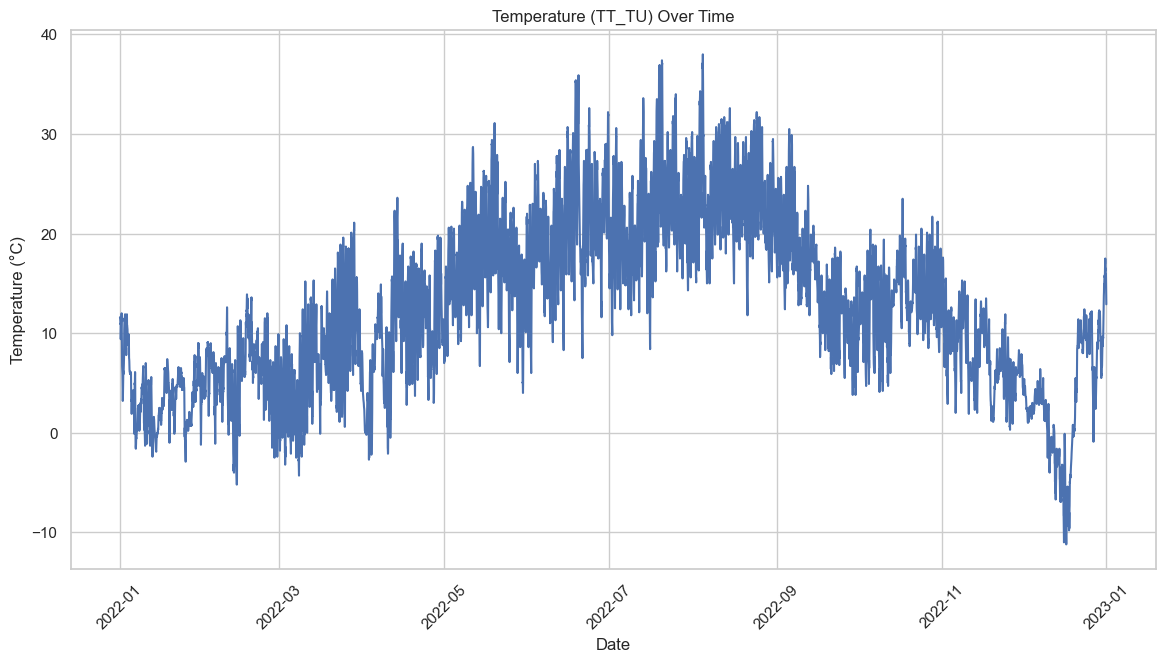

In [22]:
# Create a figure and axis for the TT_TU line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_temp_humdi, x='DateTime', y='TT_TU')
plt.title('Temperature (TT_TU) Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


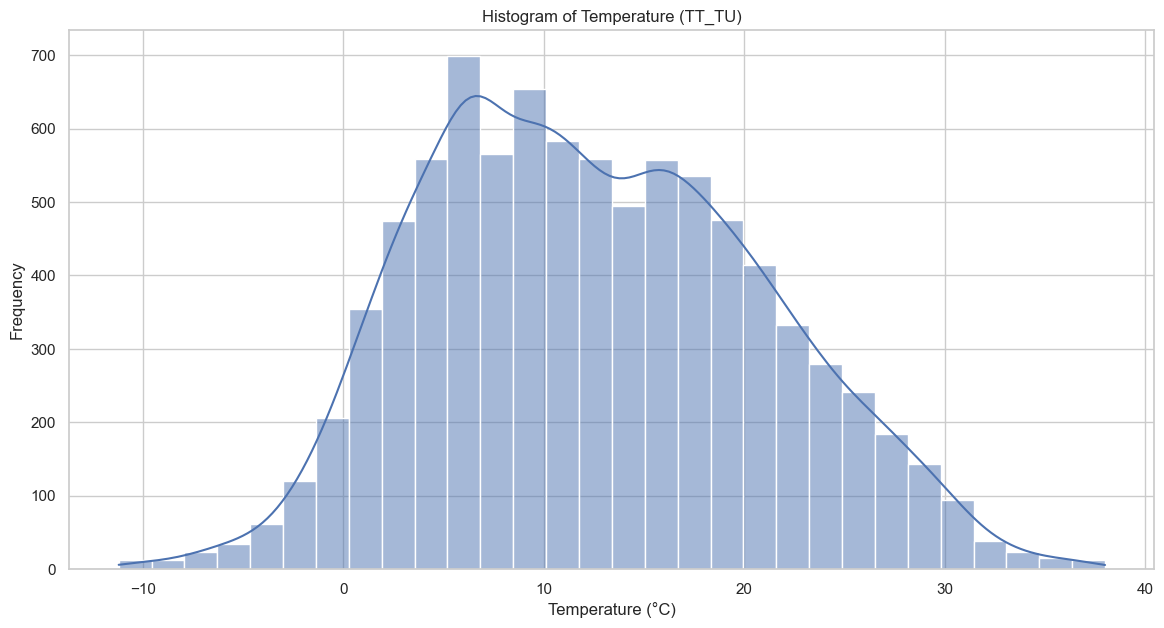

In [23]:
# Create a histogram for the RF_TU column
plt.figure(figsize=(14, 7))
sns.histplot(data=df_temp_humdi, x='TT_TU', bins=30, kde=True)
plt.title('Histogram of Temperature (TT_TU)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

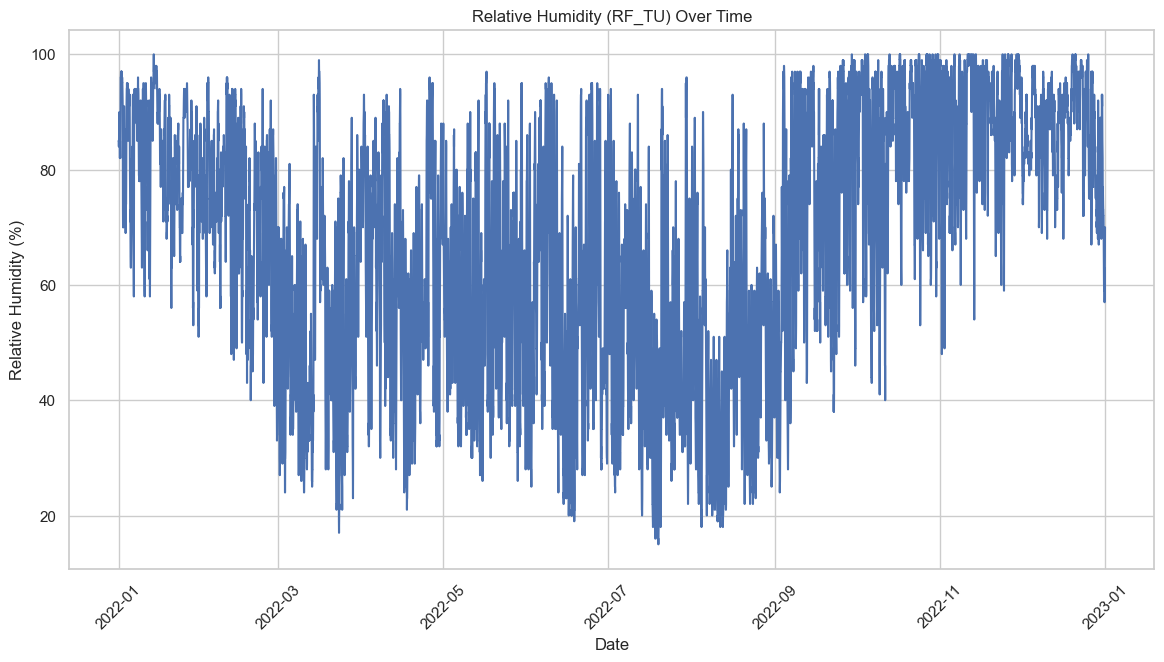

In [24]:
# Create a figure and axis for the RF_TU line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_temp_humdi, x='DateTime', y='RF_TU')
plt.title('Relative Humidity (RF_TU) Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.xticks(rotation=45)
plt.show()

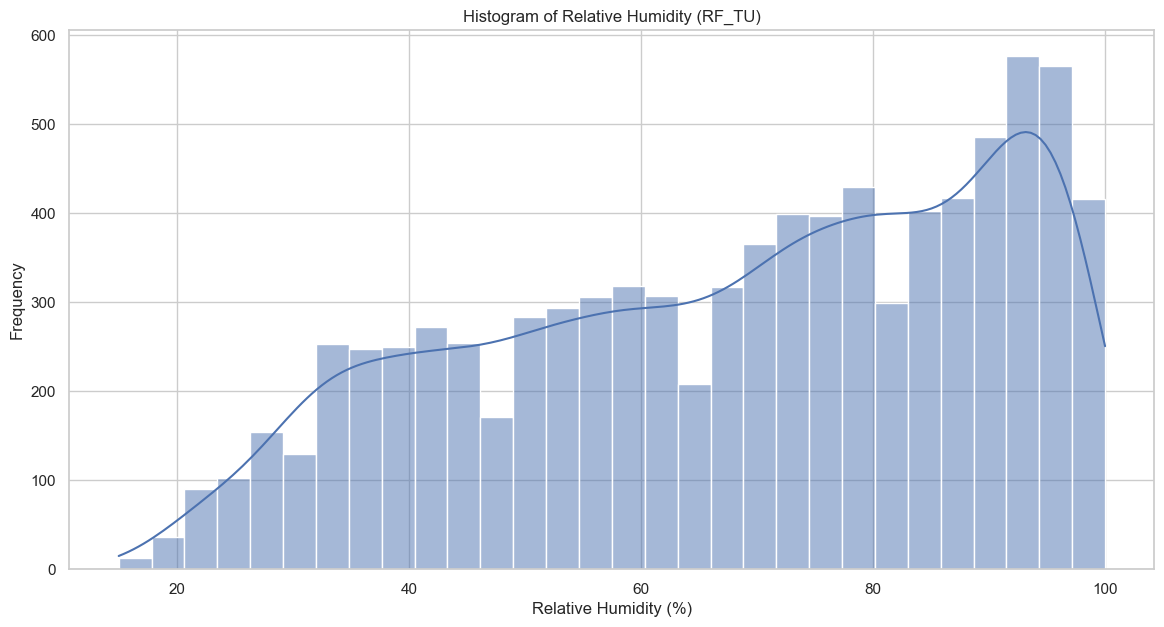

In [25]:
# Create a histogram for the RF_TU column
plt.figure(figsize=(14, 7))
sns.histplot(data=df_temp_humdi, x='RF_TU', bins=30, kde=True)
plt.title('Histogram of Relative Humidity (RF_TU)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.show()

In [26]:
df_temp_humdi = df_temp_humdi.drop(columns=['STATIONS_ID', 'QN_9', 'eor'])

In [27]:
df_temp_humdi

,DateTime,TT_TU,RF_TU
359398,2022-01-01 00:00:00,11.6,85.0
359399,2022-01-01 01:00:00,11.5,85.0
359400,2022-01-01 02:00:00,11.4,84.0
359401,2022-01-01 03:00:00,11.2,85.0
359402,2022-01-01 04:00:00,11.1,86.0
...,...,...,...
368153,2022-12-31 19:00:00,15.9,57.0
368154,2022-12-31 20:00:00,15.6,58.0
368155,2022-12-31 21:00:00,14.8,61.0
368156,2022-12-31 22:00:00,14.1,65.0


In [28]:
output_path = '../data_preprocessing/Processed_data/hourly_temp_humdi.csv'
df_temp_humdi.to_csv(output_path, index=False)

# Wind
- FF: Wind Speed in m/s
- DD: Wind Direction in degrees

In [29]:
df_wind = df_wind.drop(columns=['STATIONS_ID', 'QN_3', 'eor'])

In [30]:
df_wind.head()

,DateTime,F,D
468776,2022-01-01 00:00:00,4.3,220
468777,2022-01-01 01:00:00,4.2,220
468778,2022-01-01 02:00:00,3.5,210
468779,2022-01-01 03:00:00,3.4,200
468780,2022-01-01 04:00:00,4.4,200


In [31]:
df_wind.keys()

Index(['DateTime', '   F', '   D'], dtype='object')

In [32]:
# Filter rows where the F column values are less than 0
df_wind_negative_F = df_wind[df_wind['   F'] < 0]
df_wind_negative_F

,DateTime,F,D
471810,2022-05-07 10:00:00,-999.0,10
471811,2022-05-07 11:00:00,-999.0,50
471812,2022-05-07 12:00:00,-999.0,60
471813,2022-05-07 13:00:00,-999.0,50
471814,2022-05-07 14:00:00,-999.0,30
471815,2022-05-07 15:00:00,-999.0,50
471816,2022-05-07 16:00:00,-999.0,40
471817,2022-05-07 17:00:00,-999.0,60
471818,2022-05-07 18:00:00,-999.0,20
471834,2022-05-08 10:00:00,-999.0,50


In [33]:
# Replace negative values in the F column with NaN
df_wind['   F'] = df_wind['   F'].apply(lambda x: np.nan if x < 0 else x)

In [34]:
# Forward fill and backward fill to replace NaN with the nearest non-negative values
df_wind['   F'].fillna(method='ffill', inplace=True)
df_wind['   F'].fillna(method='bfill', inplace=True)

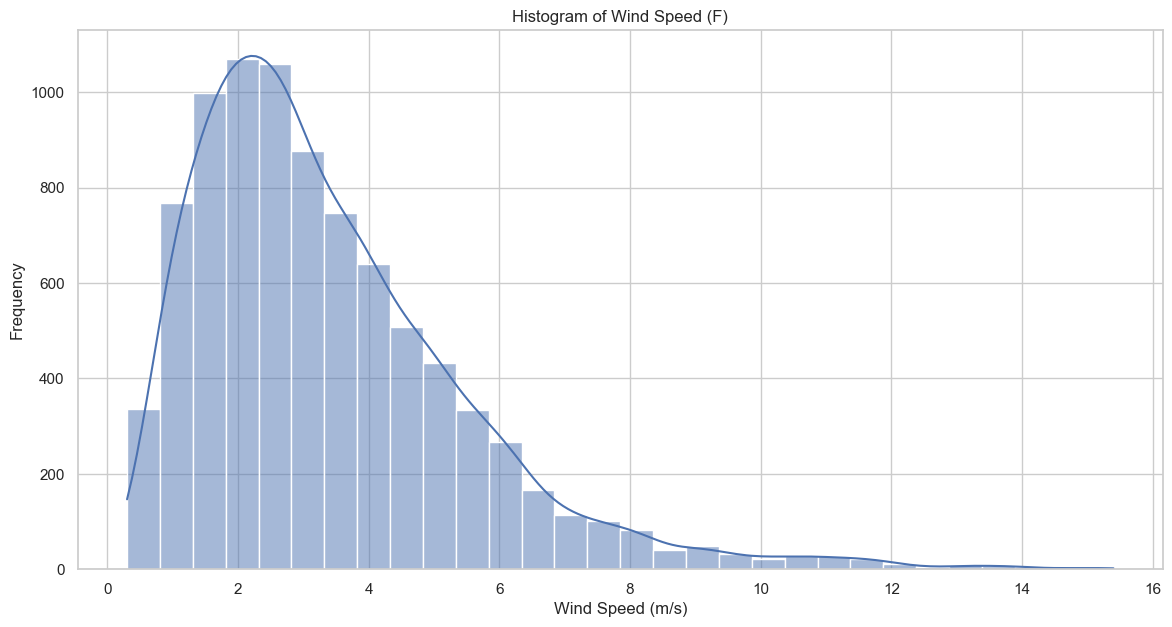

In [35]:
# Create a histogram for the F column
plt.figure(figsize=(14, 7))
sns.histplot(data=df_wind, x='   F', bins=30, kde=True)
plt.title('Histogram of Wind Speed (F)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

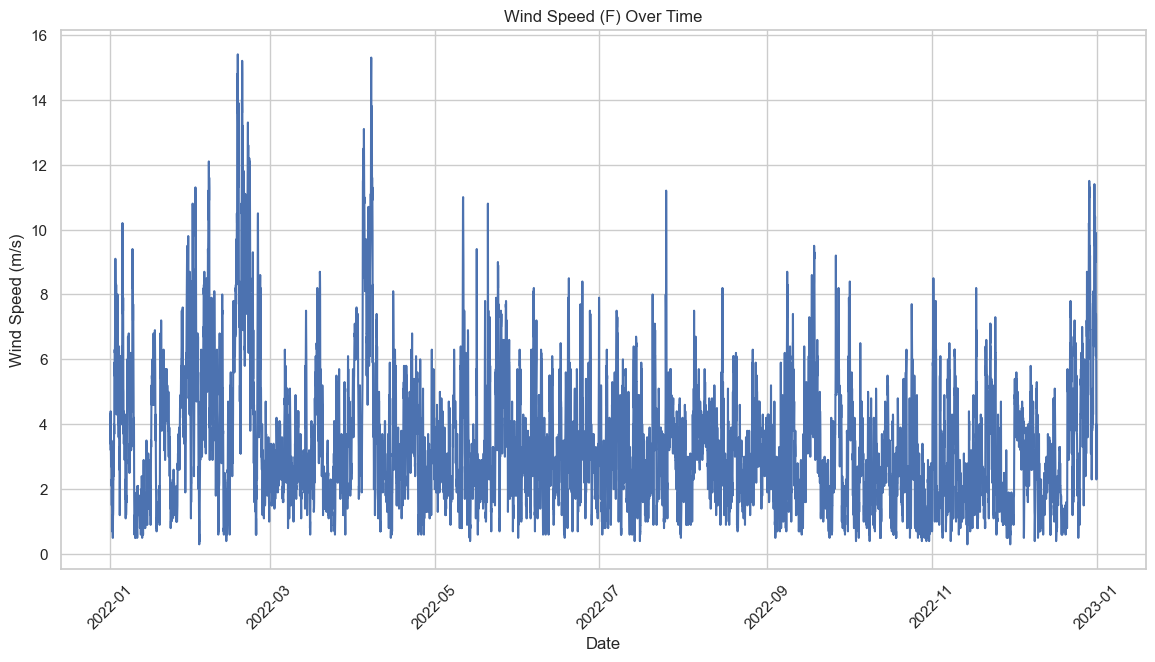

In [36]:
# Create a line plot for the F column
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_wind, x='DateTime', y='   F')
plt.title('Wind Speed (F) Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.show()

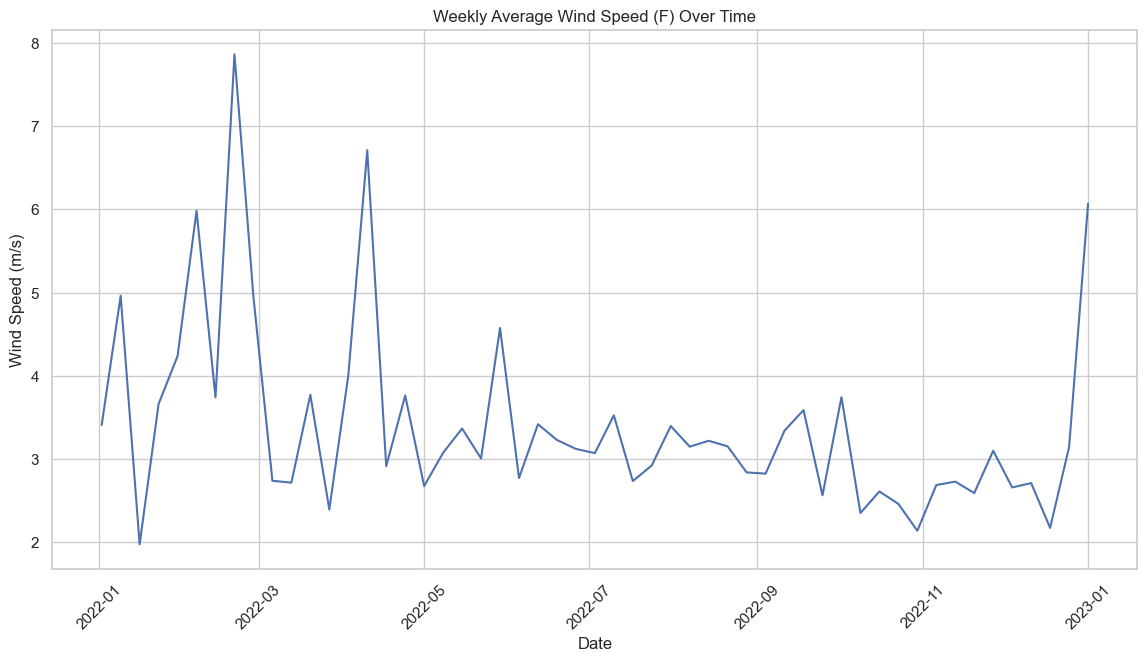

In [37]:
# Resample the data by week, taking the mean of each week
df_wind_weekly = df_wind.resample('W', on='DateTime').mean()

# Create a line plot for the resampled F column
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_wind_weekly, x='DateTime', y='   F')
plt.title('Weekly Average Wind Speed (F) Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.show()

In [38]:
df_wind_negative_D = df_wind[df_wind['   D'] < 0]
df_wind_negative_D

,DateTime,F,D


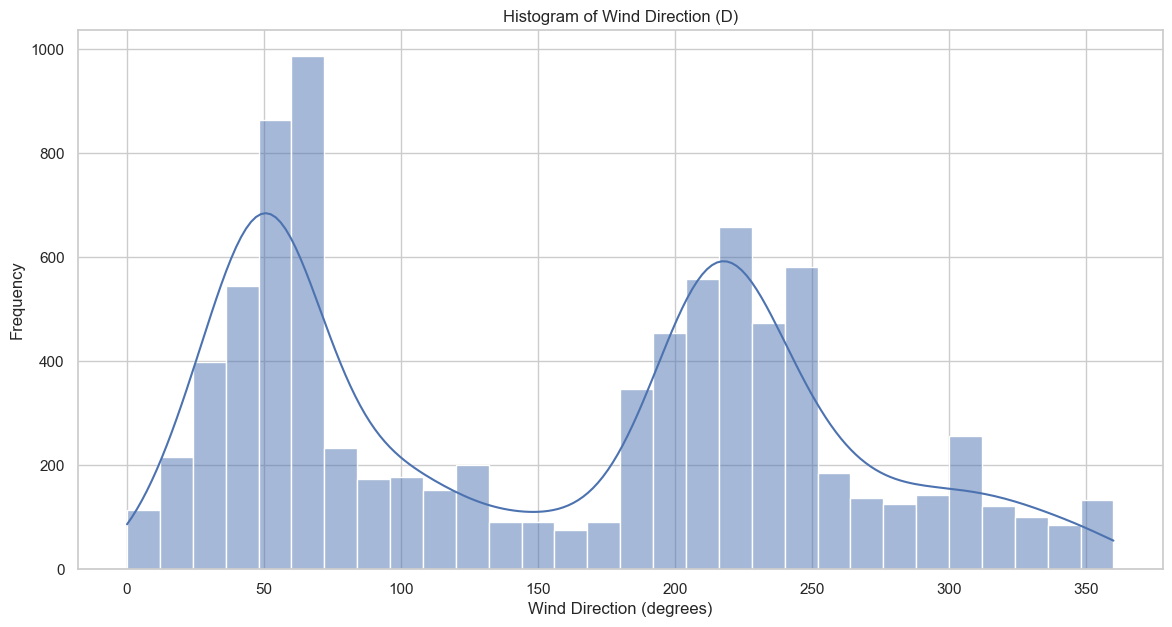

In [39]:
# Create a histogram for the D column
plt.figure(figsize=(14, 7))
sns.histplot(data=df_wind, x='   D', bins=30, kde=True)
plt.title('Histogram of Wind Direction (D)')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Frequency')
plt.show()

# Precipitation
- R1: Precipitation Height in mm
- RS_IND: Precipitation Indicator
- WRTR: Precipitation Type
- RSK: Precipitation Form


In [40]:
df_precipitation

,STATIONS_ID,DateTime,QN_8,R1,RS_IND,WRTR,eor
229870,1420,2022-01-01 00:00:00,3,0.0,0,-999,eor
229871,1420,2022-01-01 01:00:00,3,0.0,0,0,eor
229872,1420,2022-01-01 02:00:00,3,0.0,0,0,eor
229873,1420,2022-01-01 03:00:00,3,0.0,0,-999,eor
229874,1420,2022-01-01 04:00:00,3,0.0,0,0,eor
...,...,...,...,...,...,...,...
238623,1420,2022-12-31 19:00:00,3,0.0,0,0,eor
238624,1420,2022-12-31 20:00:00,3,0.0,0,0,eor
238625,1420,2022-12-31 21:00:00,3,0.0,0,0,eor
238626,1420,2022-12-31 22:00:00,3,0.0,0,0,eor


In [41]:
df_precipitation.keys()

Index(['STATIONS_ID', 'DateTime', 'QN_8', '  R1', 'RS_IND', 'WRTR', 'eor'], dtype='object')

In [42]:
# Drop the columns that are not needed
df_precipitation = df_precipitation.drop(columns=['STATIONS_ID', 'QN_8','RS_IND', 'WRTR','eor'])

In [43]:
# Filter rows where the R1 column values are less than 0
df_precipitation_negative_R1 = df_precipitation[df_precipitation['  R1'] < 0]
df_precipitation_negative_R1

,DateTime,R1
229917,2022-01-02 23:00:00,-999.0
229918,2022-01-03 01:00:00,-999.0
229919,2022-01-03 02:00:00,-999.0
229920,2022-01-03 03:00:00,-999.0
229921,2022-01-03 04:00:00,-999.0
229922,2022-01-03 05:00:00,-999.0
229923,2022-01-03 06:00:00,-999.0
229924,2022-01-03 07:00:00,-999.0
229925,2022-01-03 08:00:00,-999.0
229926,2022-01-03 09:00:00,-999.0


In [44]:
# Replace negative values in the R1 column with NaN
df_precipitation['  R1'] = df_precipitation['  R1'].apply(lambda x: np.nan if x < 0 else x)
# Forward fill and backward fill to replace NaN with the nearest non-negative values
df_precipitation['  R1'].fillna(method='ffill', inplace=True)
df_precipitation['  R1'].fillna(method='bfill', inplace=True)

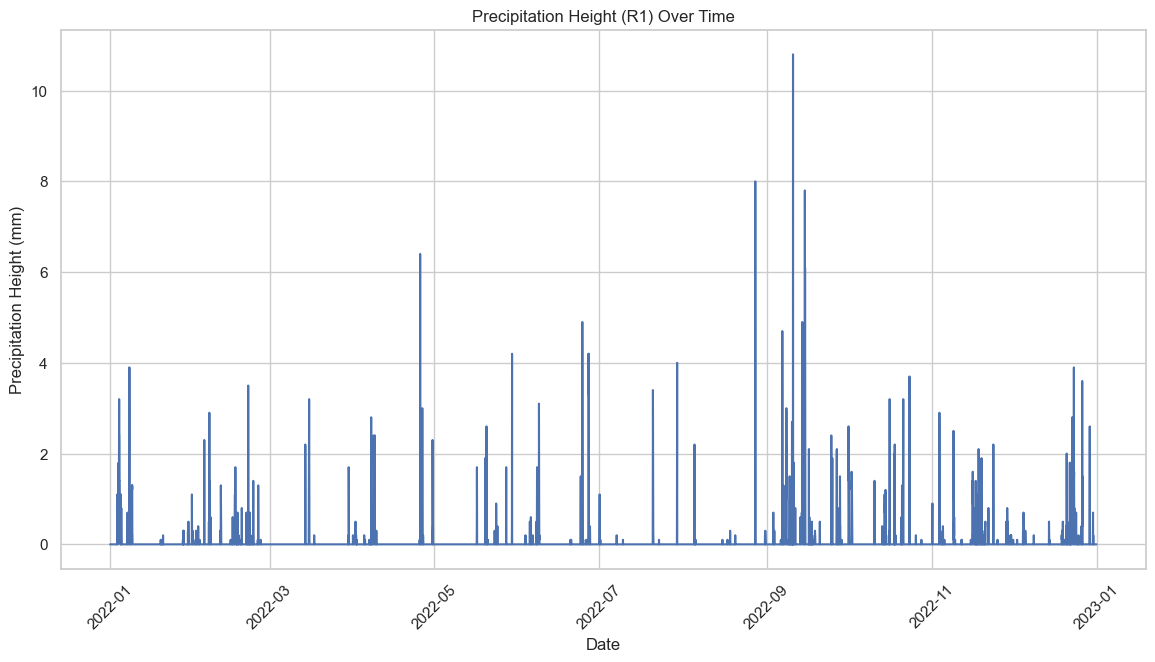

In [45]:
# Create a line plot for the R1 column
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_precipitation, x='DateTime', y='  R1')
plt.title('Precipitation Height (R1) Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation Height (mm)')
plt.xticks(rotation=45)
plt.show()

# Dewpoint
- TD: Dewpoint in Celsius


In [46]:
df_dewpoint

,STATIONS_ID,DateTime,QN_8,TT,TD,eor
580787,1420,2022-01-01 00:00:00,3,11.6,9.1,eor
580788,1420,2022-01-01 01:00:00,3,11.5,9.1,eor
580789,1420,2022-01-01 02:00:00,3,11.4,8.9,eor
580790,1420,2022-01-01 03:00:00,3,11.2,8.9,eor
580791,1420,2022-01-01 04:00:00,3,11.1,8.8,eor
...,...,...,...,...,...,...
589542,1420,2022-12-31 19:00:00,3,15.9,7.3,eor
589543,1420,2022-12-31 20:00:00,3,15.6,7.4,eor
589544,1420,2022-12-31 21:00:00,3,14.8,7.4,eor
589545,1420,2022-12-31 22:00:00,3,14.1,7.5,eor


In [47]:
df_dewpoint.keys()

Index(['STATIONS_ID', 'DateTime', 'QN_8', '  TT', '  TD', 'eor'], dtype='object')

In [48]:
# Drop the columns that are not needed
df_dewpoint = df_dewpoint.drop(columns=['STATIONS_ID', 'QN_8', 'eor'])

In [49]:
# Filter rows where the TD column values are less than -999
df_dewpoint_negative_TD = df_dewpoint[df_dewpoint['  TD'] < -999]
df_dewpoint_negative_TD

,DateTime,TT,TD


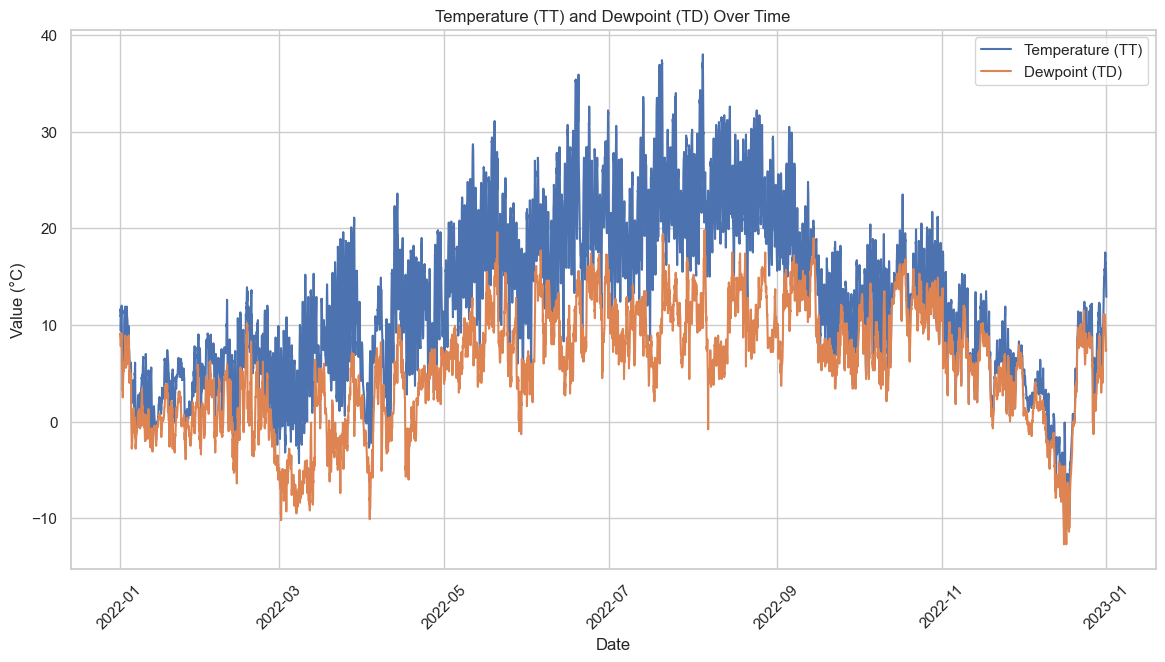

In [50]:
# Create a line plot for both TT and TD columns
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_dewpoint, x='DateTime', y='  TT', label='Temperature (TT)')
sns.lineplot(data=df_dewpoint, x='DateTime', y='  TD', label='Dewpoint (TD)')
plt.title('Temperature (TT) and Dewpoint (TD) Over Time')
plt.xlabel('Date')
plt.ylabel('Value (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Sun Duration
- SD_SO: Sun Duration in hours

In [51]:
df_sun_duration

,STATIONS_ID,DateTime,QN_7,SD_SO,eor
466345,1420,2022-01-01 03:00:00,10,0.0,eor
466346,1420,2022-01-01 04:00:00,10,0.0,eor
466347,1420,2022-01-01 05:00:00,10,0.0,eor
466348,1420,2022-01-01 06:00:00,10,0.0,eor
466349,1420,2022-01-01 07:00:00,10,0.0,eor
...,...,...,...,...,...
472847,1420,2022-12-31 16:00:00,3,0.0,eor
472848,1420,2022-12-31 17:00:00,3,0.0,eor
472849,1420,2022-12-31 18:00:00,3,0.0,eor
472850,1420,2022-12-31 19:00:00,3,0.0,eor


In [52]:
df_sun_duration.keys()

Index(['STATIONS_ID', 'DateTime', 'QN_7', 'SD_SO', 'eor'], dtype='object')

In [53]:
# Drop the columns that are not needed
df_sun_duration = df_sun_duration.drop(columns=['STATIONS_ID', 'QN_7', 'eor'])

In [54]:
# Filter rows where the SD_SO column values are less than -999

In [55]:
df_sun_duration_negative_SD_SO = df_sun_duration[df_sun_duration['SD_SO'] < -999]
df_sun_duration_negative_SD_SO

,DateTime,SD_SO


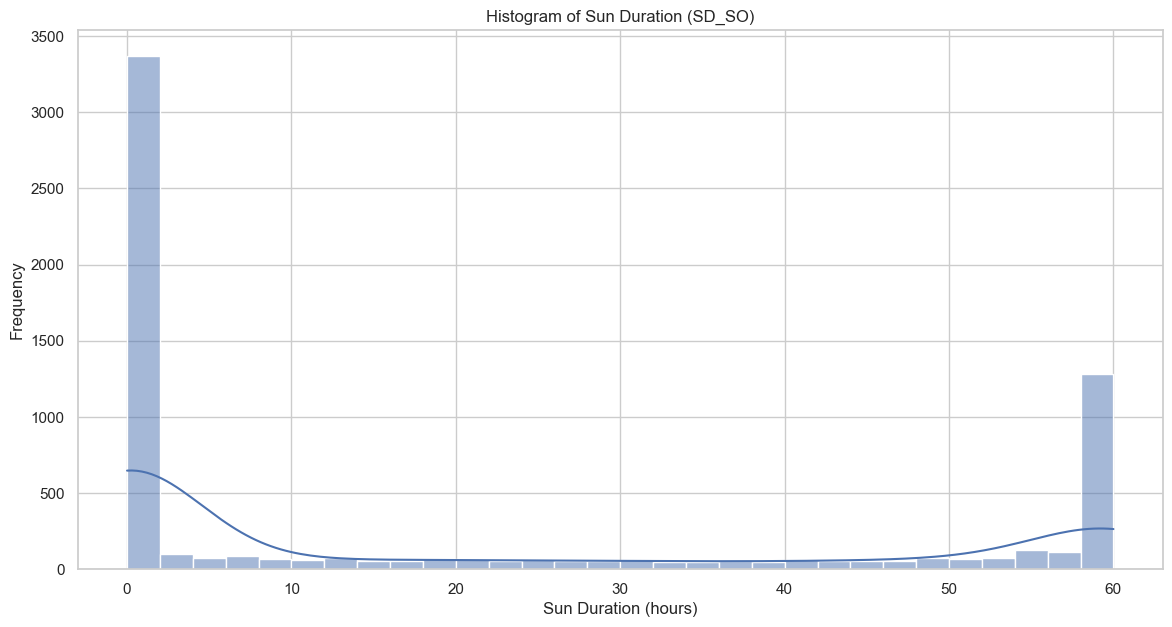

In [56]:
# Create a histogram for the SD_SO column
plt.figure(figsize=(14, 7))
sns.histplot(data=df_sun_duration, x='SD_SO', bins=30, kde=True)
plt.title('Histogram of Sun Duration (SD_SO)')
plt.xlabel('Sun Duration (hours)')
plt.ylabel('Frequency')
plt.show()

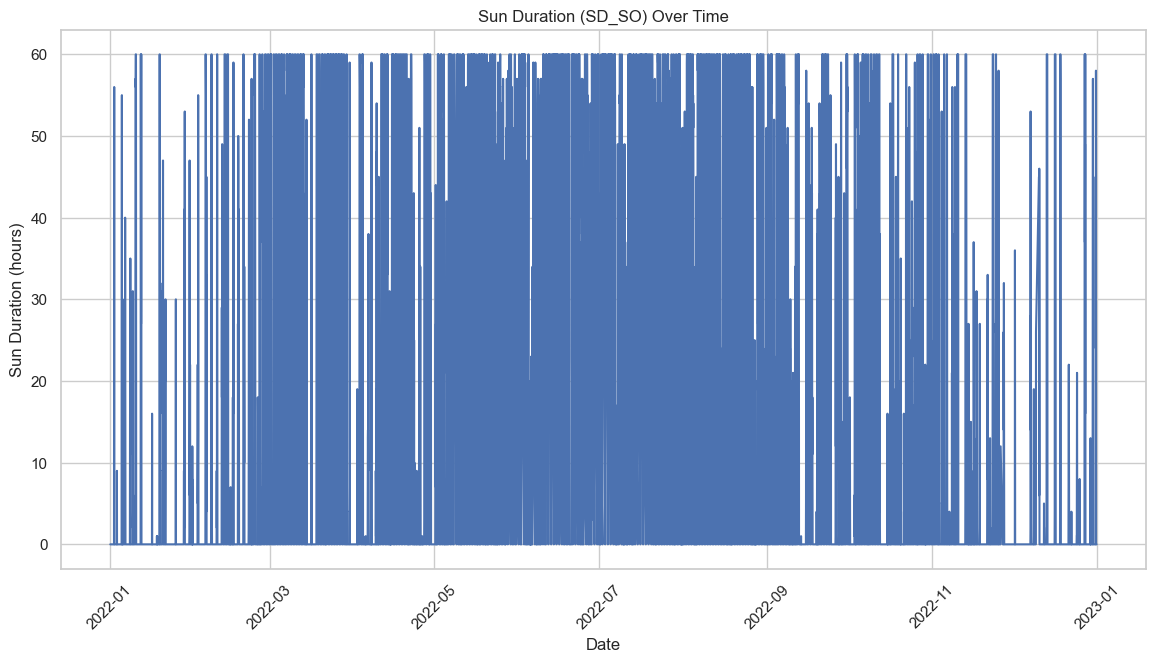

In [57]:
# Create a line plot for the SD_SO column
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_sun_duration, x='DateTime', y='SD_SO')
plt.title('Sun Duration (SD_SO) Over Time')
plt.xlabel('Date')
plt.ylabel('Sun Duration (hours)')
plt.xticks(rotation=45)
plt.show()

In [58]:
df_dewpoint.keys()

Index(['DateTime', '  TT', '  TD'], dtype='object')

In [59]:
df_sun_duration.keys()

Index(['DateTime', 'SD_SO'], dtype='object')

In [60]:
df_temp_humdi.keys()

Index(['DateTime', 'TT_TU', 'RF_TU'], dtype='object')

In [61]:
df_precipitation.keys()

Index(['DateTime', '  R1'], dtype='object')

In [62]:
df_wind.keys()

Index(['DateTime', '   F', '   D'], dtype='object')

In [63]:
columns = ['DateTime', 'TT_TU', 'TD','RF_TU', '  F', '  D', 'R1',  'SD_SO']

In [64]:
# Concatenate the DataFrames along the columns
df_weather = pd.concat([df_temp_humdi.set_index('DateTime'),
                        df_dewpoint.set_index('DateTime'),
                        df_sun_duration.set_index('DateTime'),
                        df_precipitation.set_index('DateTime'),
                        df_wind.set_index('DateTime')], axis=1).reset_index()

# Display the combined DataFrame
df_weather.head()

,DateTime,TT_TU,RF_TU,TT,TD,SD_SO,R1,F,D
0,2022-01-01 00:00:00,11.6,85.0,11.6,9.1,NaN,0.0,4.3,220
1,2022-01-01 01:00:00,11.5,85.0,11.5,9.1,NaN,0.0,4.2,220
2,2022-01-01 02:00:00,11.4,84.0,11.4,8.9,NaN,0.0,3.5,210
3,2022-01-01 03:00:00,11.2,85.0,11.2,8.9,0.0,0.0,3.4,200
4,2022-01-01 04:00:00,11.1,86.0,11.1,8.8,0.0,0.0,4.4,200


In [65]:
df_weather.isna().sum()

DateTime       0
TT_TU          0
RF_TU          0
  TT           0
  TD           0
SD_SO       2253
  R1           2
   F           0
   D           0
dtype: int64

In [66]:
df_weather.fillna(method='ffill', inplace=True)
df_weather.fillna(method='bfill', inplace=True)

In [67]:
df_weather.isna().sum()

DateTime    0
TT_TU       0
RF_TU       0
  TT        0
  TD        0
SD_SO       0
  R1        0
   F        0
   D        0
dtype: int64

In [68]:
df_weather.keys()

Index(['DateTime', 'TT_TU', 'RF_TU', '  TT', '  TD', 'SD_SO', '  R1', '   F',
       '   D'],
      dtype='object')

In [69]:
# Check if the TT and TT_TU columns are identical
df_weather['  TT'].equals(df_weather['TT_TU'])

True

In [70]:
df_weather.drop(columns=['  TT'], inplace=True)

In [71]:
df_weather.keys()

Index(['DateTime', 'TT_TU', 'RF_TU', '  TD', 'SD_SO', '  R1', '   F', '   D'], dtype='object')

In [72]:
new_columns = ['DateTime', 'Temperature','Humidity' ,'Dewpoint', 'Sun Duration', 'Precipitation Height', 'Wind Speed', 'Wind Direction']
df_weather.columns = new_columns

In [73]:
df_weather.head()

,DateTime,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,11.6,85.0,9.1,0.0,0.0,4.3,220
1,2022-01-01 01:00:00,11.5,85.0,9.1,0.0,0.0,4.2,220
2,2022-01-01 02:00:00,11.4,84.0,8.9,0.0,0.0,3.5,210
3,2022-01-01 03:00:00,11.2,85.0,8.9,0.0,0.0,3.4,200
4,2022-01-01 04:00:00,11.1,86.0,8.8,0.0,0.0,4.4,200


In [74]:
output_path = '../data_preprocessing/Processed_data/hourly_weather.csv'
df_weather.to_csv(output_path, index=False)

In [75]:
# Resample the data to daily frequency and calculate the daily maximum and minimum temperatures
df_daily_max = df_weather.resample('D', on='DateTime')['Temperature'].max().reset_index()
df_daily_min = df_weather.resample('D', on='DateTime')['Temperature'].min().reset_index()

# Merge the daily max and min temperatures into a single DataFrame
df_daily_temp = pd.merge(df_daily_max, df_daily_min, on='DateTime', suffixes=('_max', '_min'))

# Calculate the temperature difference and add it as a new column
df_daily_temp['Temp_Diff'] = df_daily_temp['Temperature_max'] - df_daily_temp['Temperature_min']

# Merge the temperature difference back into the original DataFrame
df_weather = pd.merge(df_weather, df_daily_temp[['DateTime', 'Temp_Diff']], on='DateTime', how='left')

# Display the updated DataFrame
df_weather.head()

,DateTime,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction,Temp_Diff
0,2022-01-01 00:00:00,11.6,85.0,9.1,0.0,0.0,4.3,220,7.5
1,2022-01-01 01:00:00,11.5,85.0,9.1,0.0,0.0,4.2,220,NaN
2,2022-01-01 02:00:00,11.4,84.0,8.9,0.0,0.0,3.5,210,NaN
3,2022-01-01 03:00:00,11.2,85.0,8.9,0.0,0.0,3.4,200,NaN
4,2022-01-01 04:00:00,11.1,86.0,8.8,0.0,0.0,4.4,200,NaN
